### 📌 Final Insights:

- Netflix has more **movies** than TV shows.
- Most content comes from the **United States**, followed by India and the UK.
- A large number of shows were added between **2017–2020**.
- Netflix expanded its content rapidly after **2015**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for nicer plots
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Check shape and info
print("Shape of data:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()

Shape of data: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Fill or drop missing values
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\3449406034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\3449406034.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [9]:
# Convert date column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\1539688304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="pastel")


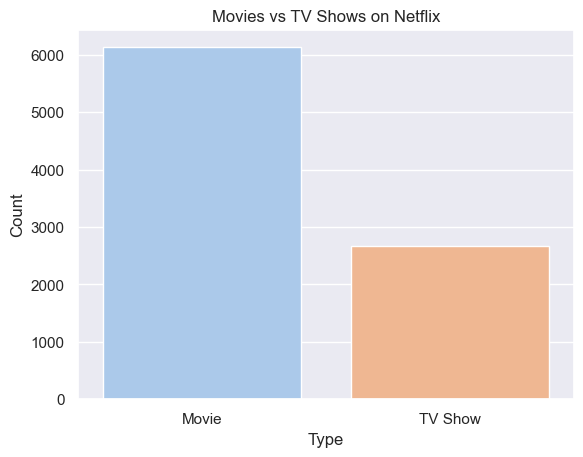

In [11]:
sns.countplot(x='type', data=df, palette="pastel")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

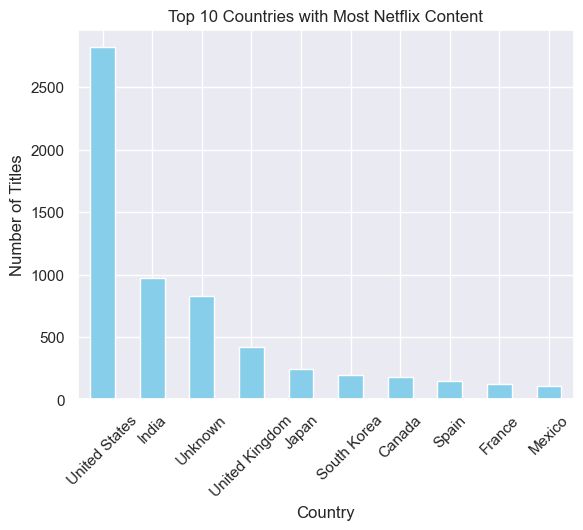

In [13]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

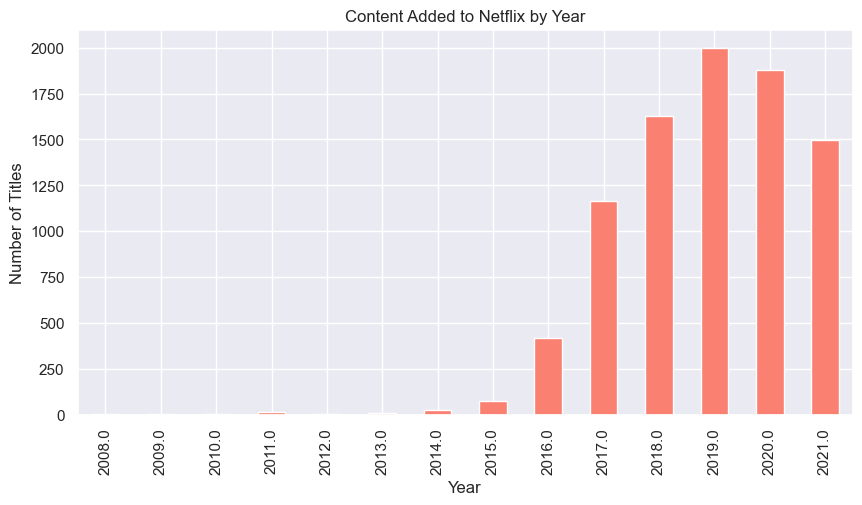

In [15]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color='salmon')
plt.title("Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()